In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
# loading in the breast cancer data set from the scikit-learn package
from sklearn.datasets import load_breast_cancer
bcdata = load_breast_cancer(as_frame = True)

In [3]:
# overview of 'data'
bcdata.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# overview of 'target
bcdata.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
# checking 'target_names'
bcdata.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# creating a copy of 'data'
df = bcdata.data.copy()
# adding 'target' to 'data'
df['target'] = bcdata.target
# creating 'tumor type' variable based on value of 'target'
df.loc[df['target'] == 0, 'tumor type'] = 'malignant'
df.loc[df['target'] == 1, 'tumor type'] = 'benign'
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,tumor type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
# checking for missing data
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
tumor type                 0
dtype: int64

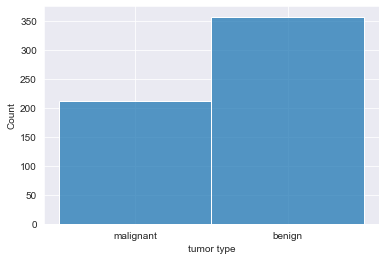

In [9]:
# histogram of tumor type
sns.histplot(data = df, x = 'tumor type')
plt.rcParams['figure.figsize'] = 8,10
plt.show()

In [10]:
# correlation matrix
df.corr()['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

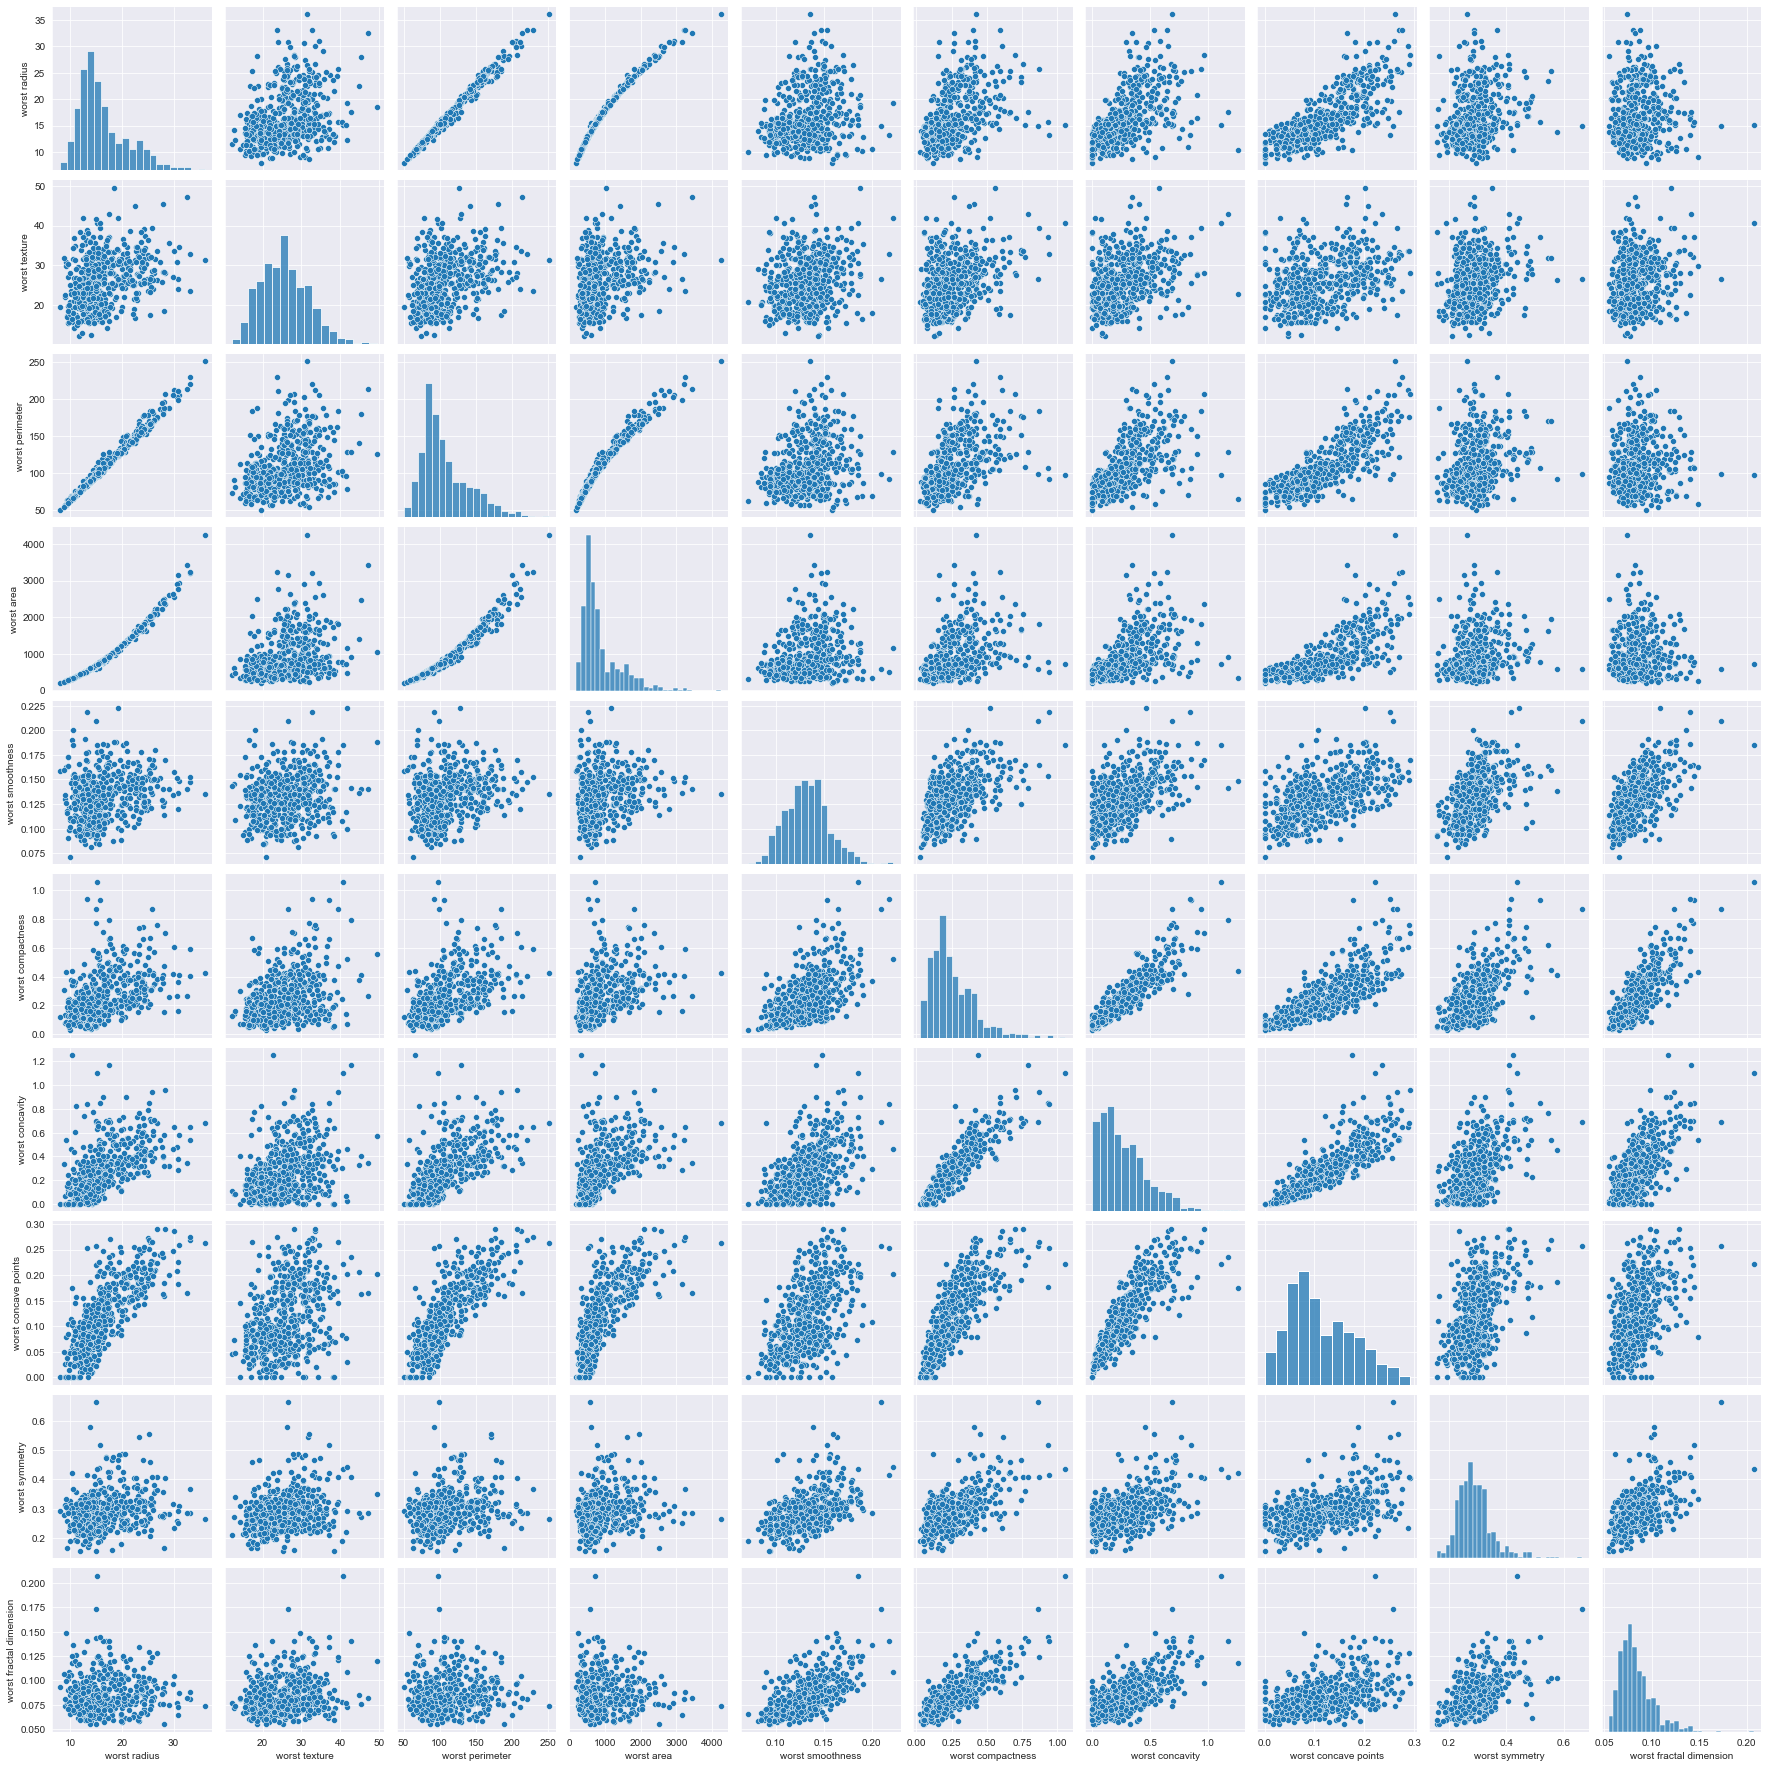

In [11]:
#pairplot for 'worst' variables
sns.pairplot(data = df, vars = [var for var in df.columns if 'worst' in var])
plt.show()

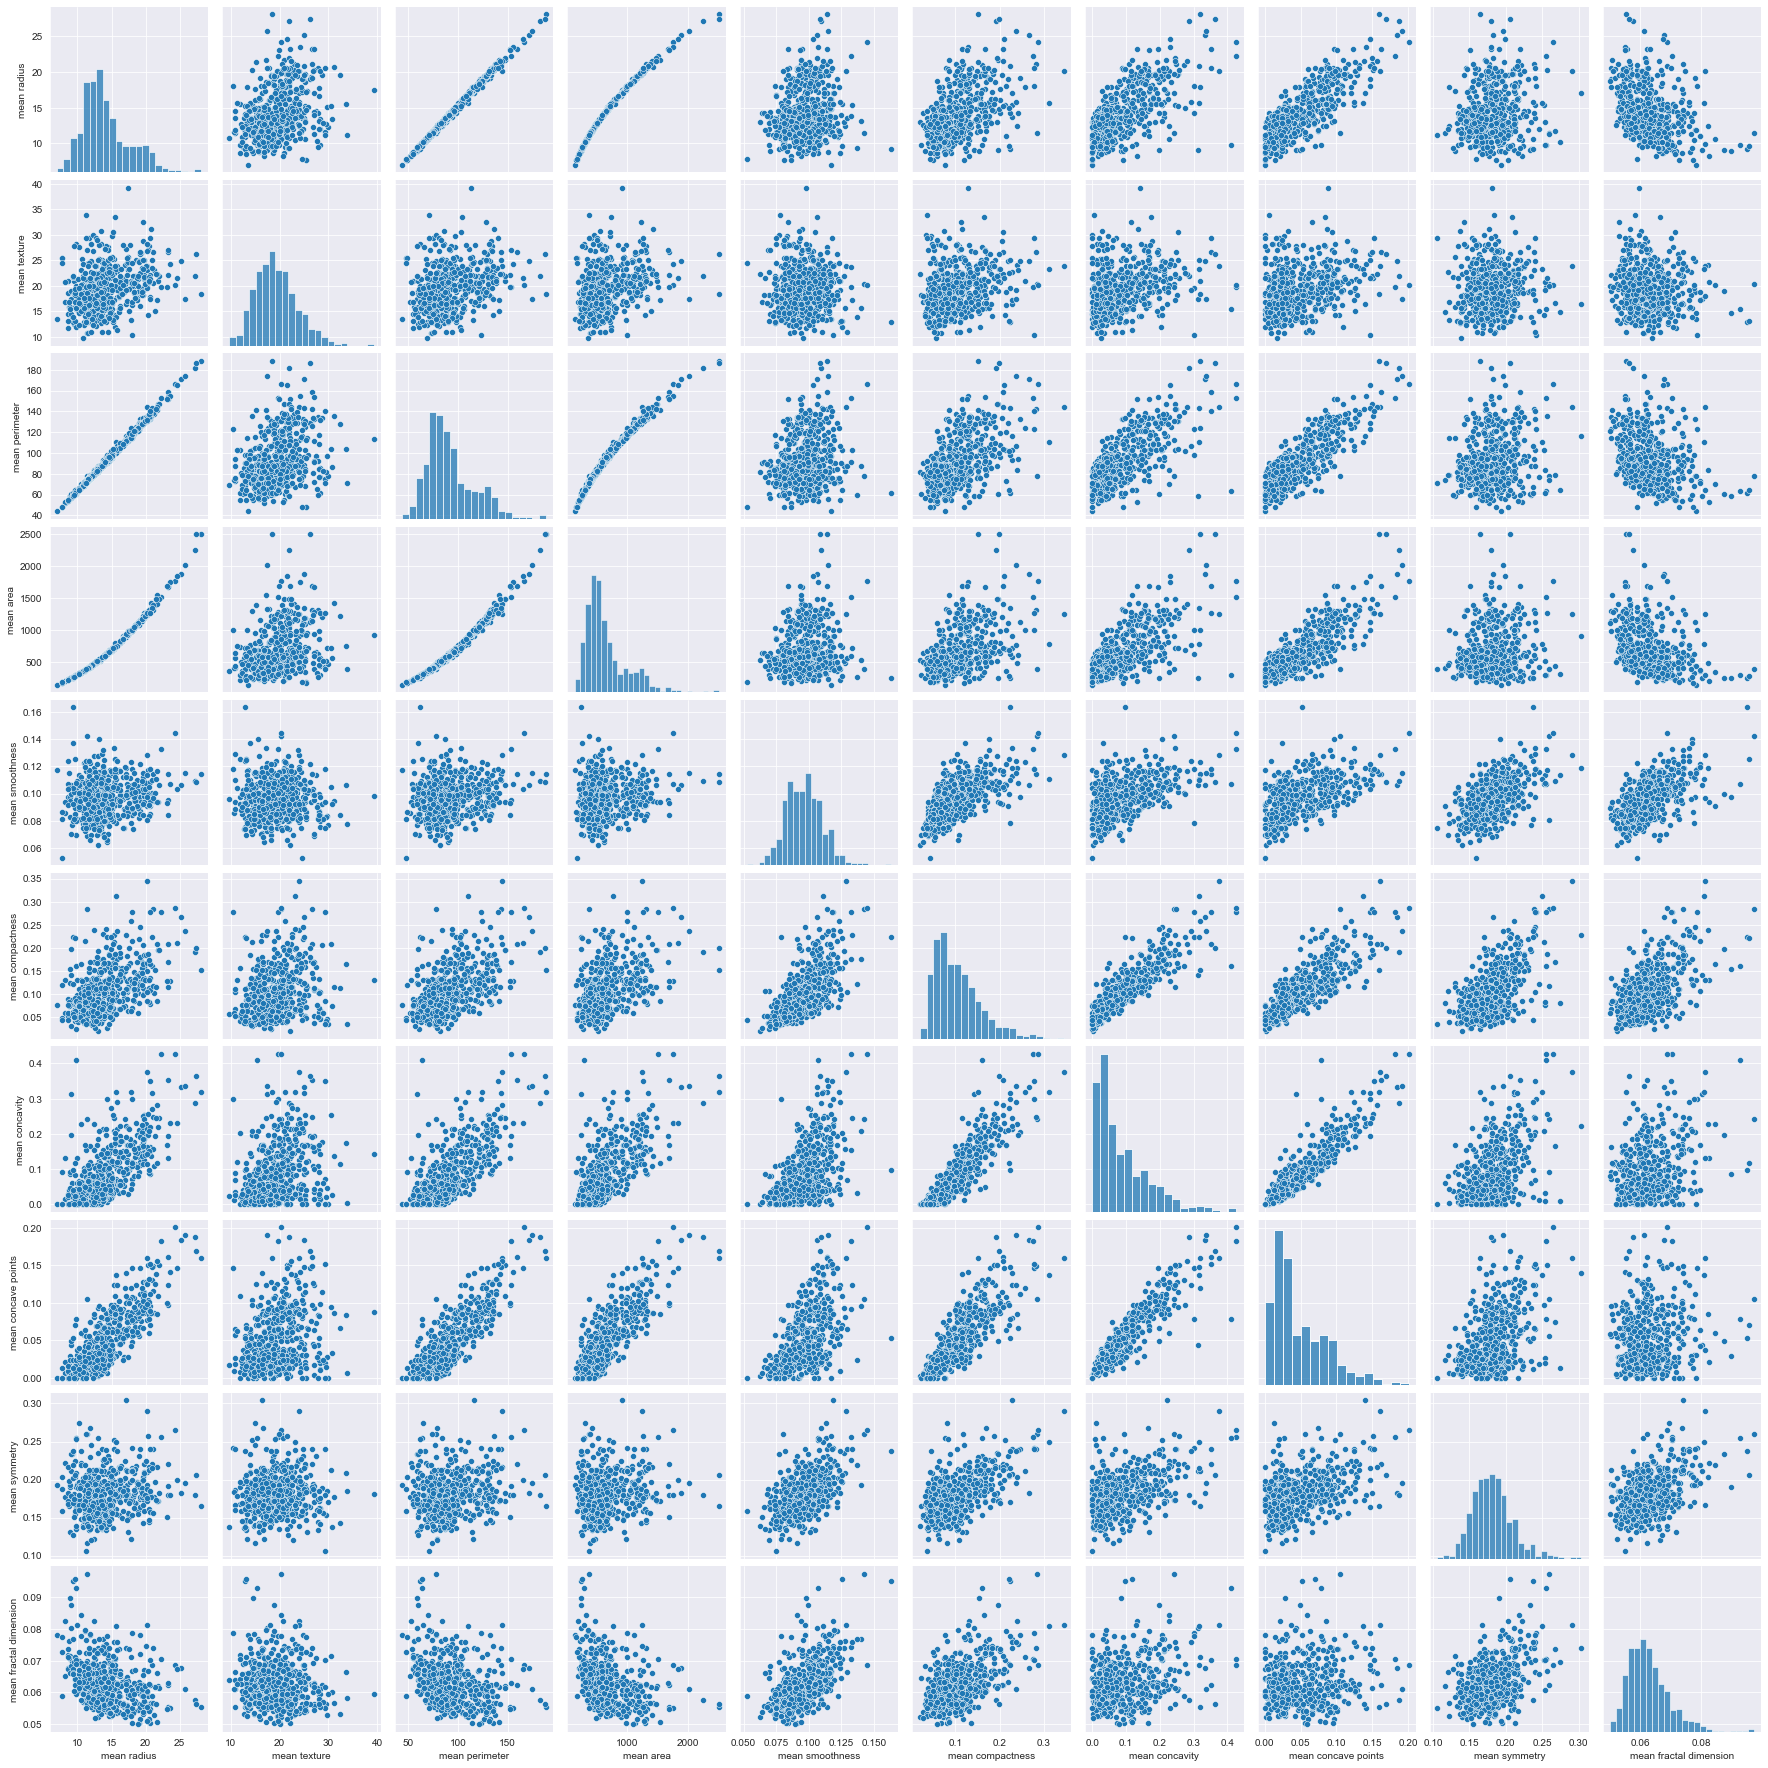

In [12]:
#pairplot for 'mean' variables
sns.pairplot(data = df, vars = [var for var in df.columns if 'mean' in var])
plt.show()

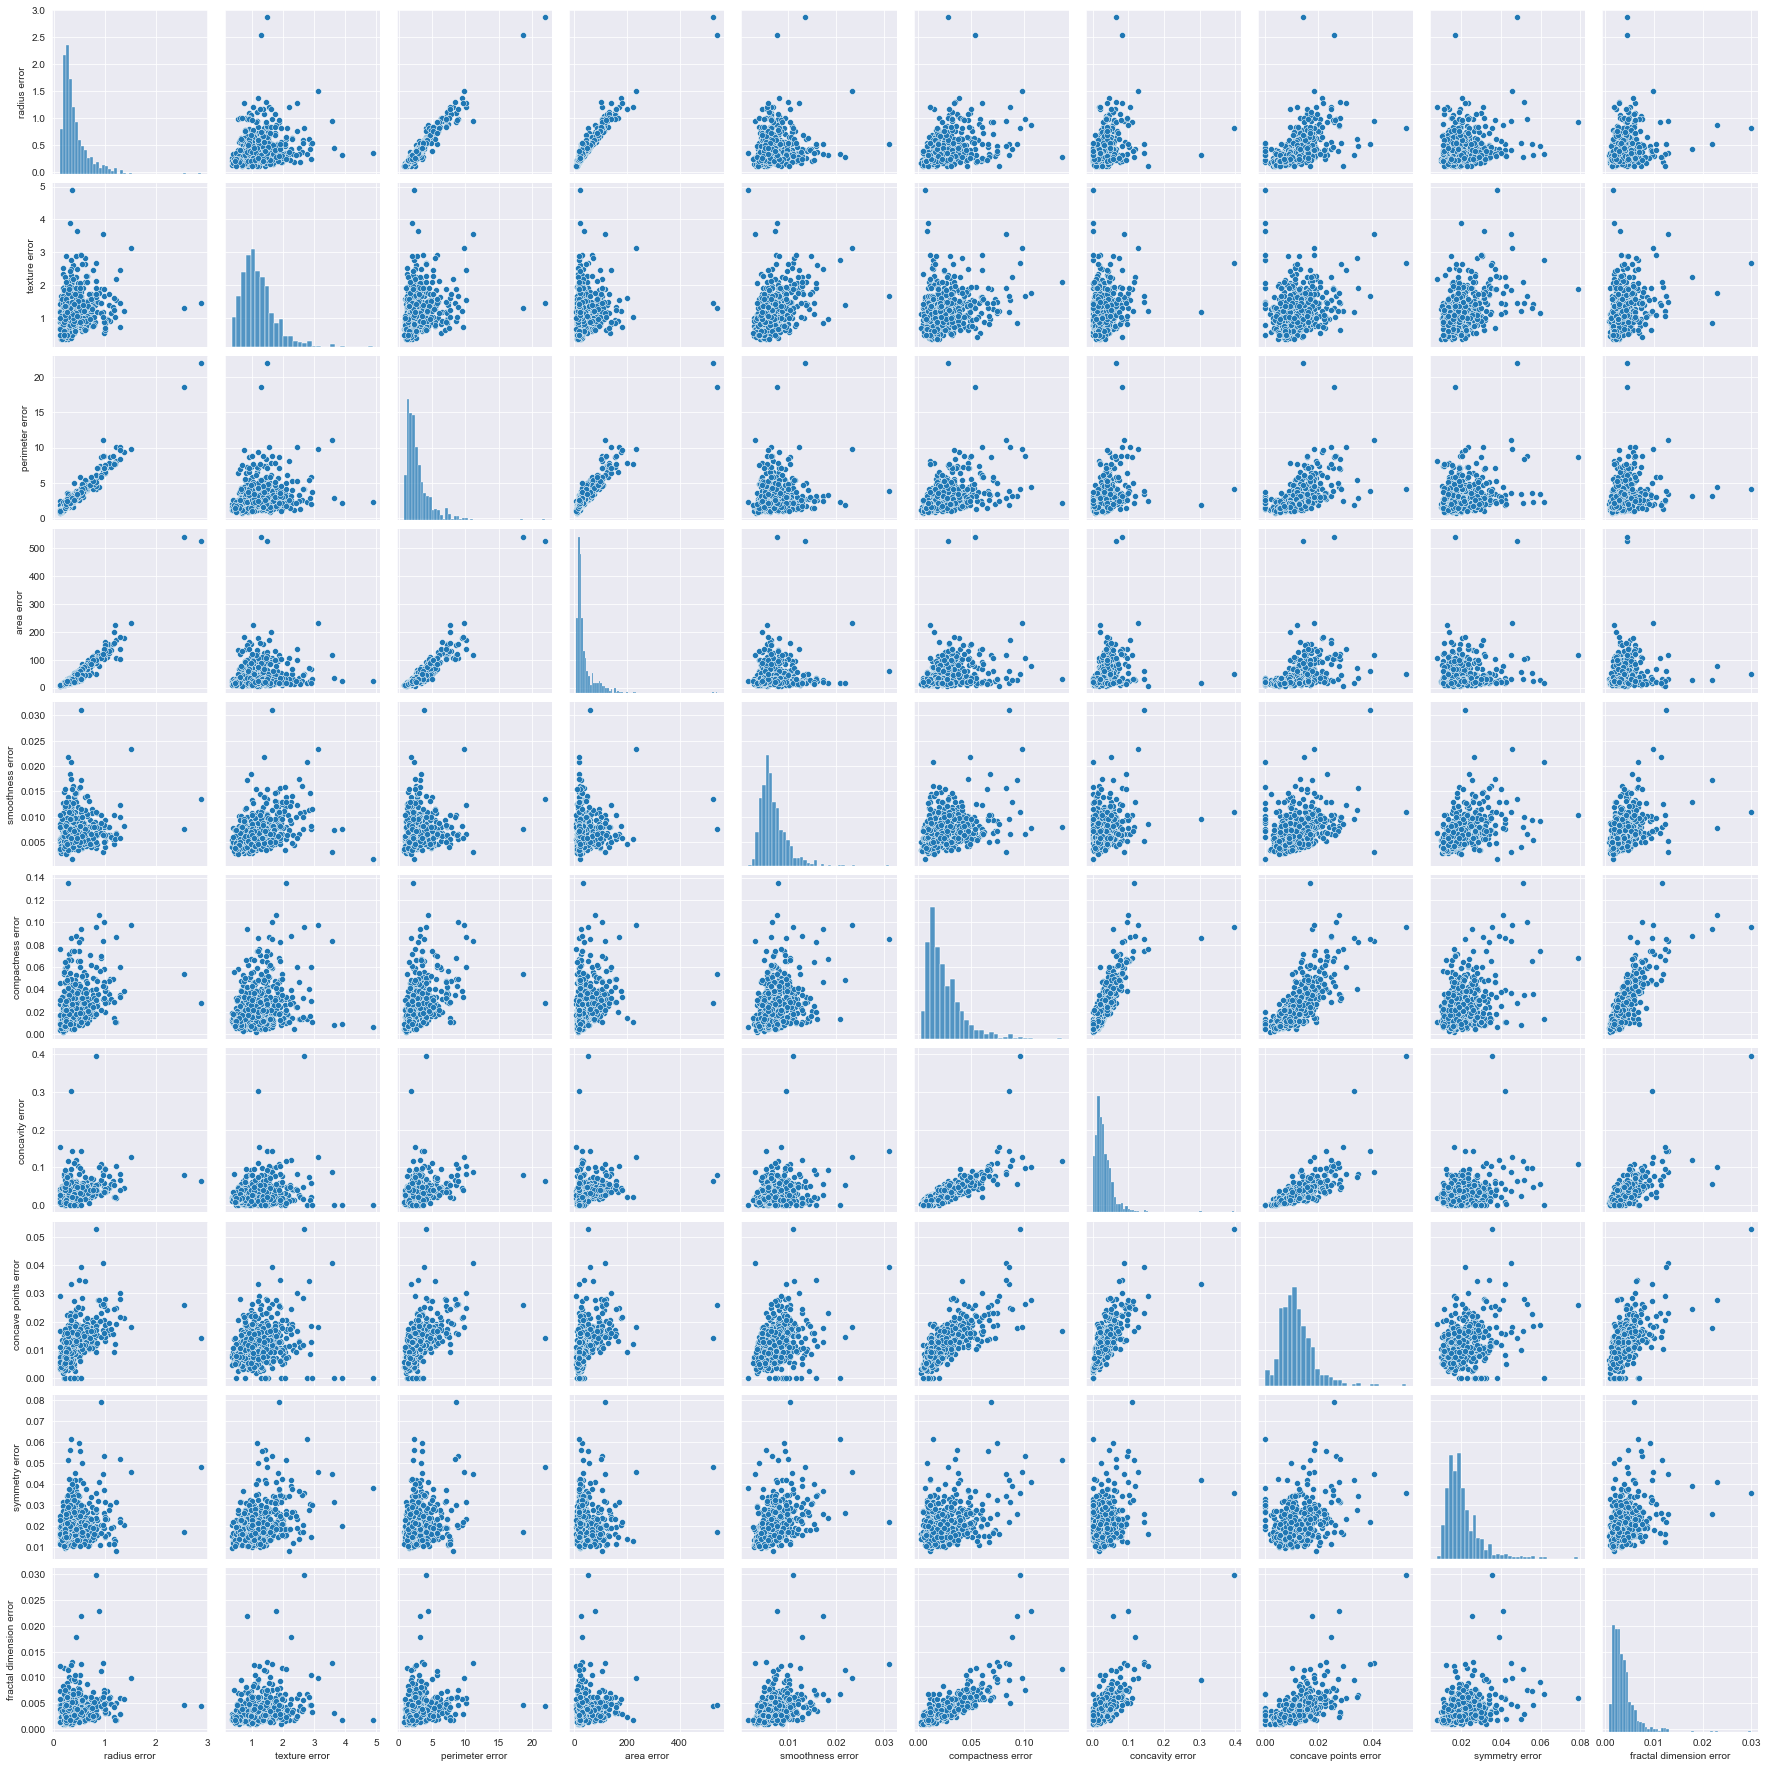

In [13]:
#pairplot for 'worst' variables
sns.pairplot(data = df, vars = [var for var in df.columns if 'error' in var])
plt.show()

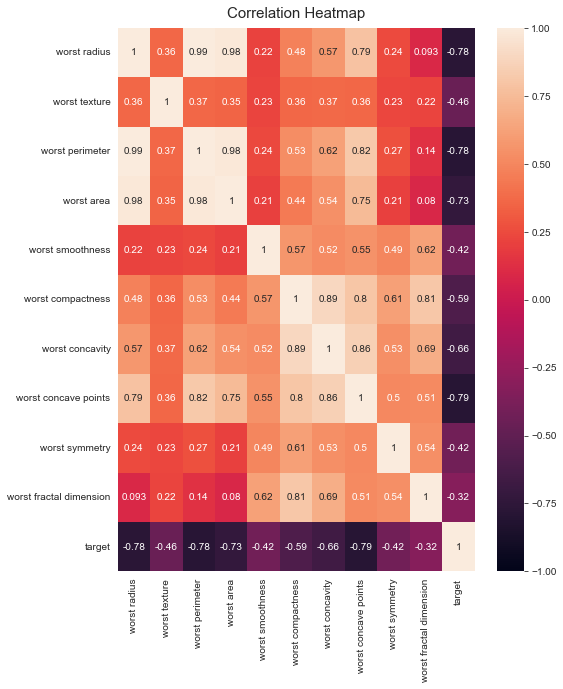

In [14]:
# Correlation Heatmap for 'worst' variables
heatmap = sns.heatmap(df[[var for var in df.columns if 'worst' in var] + ['target']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', pad = 10, fontsize = 15)
plt.rcParams['figure.figsize'] = 8,10

In [15]:
pd.DataFrame(abs(df[[var for var in df if 'worst' in var]].corr())).sum(axis = 1).sort_values(ascending = False)

worst concave points       6.928767
worst concavity            6.589264
worst compactness          6.490779
worst perimeter            5.945682
worst radius               5.728457
worst area                 5.534418
worst fractal dimension    4.694771
worst symmetry             4.636370
worst smoothness           4.633787
worst texture              3.837393
dtype: float64

In [16]:
# analyzing the VIF for a numerical view of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
worstdf = df[[var for var in df.columns if 'worst' in var]].copy()
wdf_c = add_constant(worstdf)
vifdf = pd.DataFrame()
vifdf['feature'] = wdf_c.columns
vifdf['VIF'] = [variance_inflation_factor(wdf_c, i) for i in range(len(wdf_c.columns))]
vifdf #values lower than 5 show variables with low multicollinearity

,feature,VIF
0,const,347.631786
1,worst radius,137.240242
2,worst texture,1.245196
3,worst perimeter,137.144011
4,worst area,38.242592
5,worst smoothness,2.182047
6,worst compactness,11.471750
7,worst concavity,7.052154
8,worst concave points,10.810293
9,worst symmetry,1.731597


In [17]:
# analyzing the VIF for a numerical view of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
worstdf = df.iloc[:, :30].copy()
wdf_c = add_constant(worstdf)
vifdf = pd.DataFrame()
vifdf['feature'] = wdf_c.columns
vifdf['VIF'] = [variance_inflation_factor(wdf_c, i) for i in range(len(wdf_c.columns))]
vifdf #values lower than 5 show variables with low multicollinearity

,feature,VIF
0,const,1868.188844
1,mean radius,3806.115296
2,mean texture,11.884048
3,mean perimeter,3786.400419
4,mean area,347.878657
5,mean smoothness,8.194282
6,mean compactness,50.505168
7,mean concavity,70.767720
8,mean concave points,60.041733
9,mean symmetry,4.220656


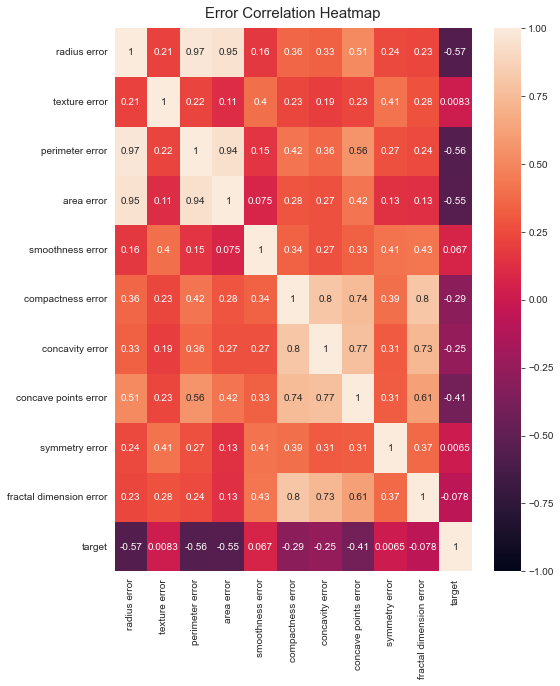

In [18]:
# Error Correlation Heatmap
heatmap = sns.heatmap(df[[var for var in df.columns if 'error' in var] + ['target']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Error Correlation Heatmap', pad = 10, fontsize = 15)
plt.rcParams['figure.figsize'] = 8,10

In [19]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :30], df['target'], test_size = 0.2, random_state = 12)

In [20]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(X_train)
Xs_train = sc.transform(X_train)
Xs_test = sc.transform(X_test)

In [21]:
# applying PCA function
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(Xs_train)

In [22]:
# eigenvalues of principal components
eigvals = pca.explained_variance_
eigvals

array([1.32011999e+01, 5.75095612e+00, 2.87140057e+00, 1.96273661e+00,
       1.74305551e+00, 1.19744182e+00, 6.58333139e-01, 4.56143050e-01,
       4.38246318e-01, 3.61921228e-01, 2.98122557e-01, 2.67499571e-01,
       2.18860461e-01, 1.41927241e-01, 8.73097876e-02, 8.28611967e-02,
       5.83217551e-02, 5.73305521e-02, 4.44757201e-02, 3.25889629e-02,
       2.99357255e-02, 2.84507313e-02, 2.20446506e-02, 1.99157127e-02,
       1.69462170e-02, 8.36414788e-03, 7.28469329e-03, 1.66194109e-03,
       6.25842454e-04, 1.17568359e-04])

In [23]:
eigvects = pca.components_
eigvects

array([[ 2.22181137e-01,  1.05316578e-01,  2.30378639e-01,
         2.24962711e-01,  1.41422637e-01,  2.39158506e-01,
         2.57126302e-01,  2.62633444e-01,  1.28399193e-01,
         5.37104600e-02,  2.10340640e-01,  7.36361697e-03,
         2.16459242e-01,  2.11262673e-01,  9.95565723e-03,
         1.63351819e-01,  1.41561659e-01,  1.79546350e-01,
         9.50574868e-03,  9.19470268e-02,  2.31658749e-01,
         1.06158500e-01,  2.39691097e-01,  2.28657612e-01,
         1.28146107e-01,  2.10556636e-01,  2.27640508e-01,
         2.52287432e-01,  1.14006833e-01,  1.30080799e-01],
       [-2.25033962e-01, -7.32672345e-02, -2.06785451e-01,
        -2.20606216e-01,  1.83459488e-01,  1.54629698e-01,
         7.69879615e-02, -2.33929619e-02,  1.84672477e-01,
         3.73052437e-01, -8.51029136e-02,  8.42145509e-02,
        -7.09935604e-02, -1.37966644e-01,  2.16021957e-01,
         2.43007832e-01,  2.22408394e-01,  1.57420157e-01,
         2.00166339e-01,  2.88430023e-01, -2.15078507e-

In [24]:
loadings = eigvects * np.sqrt(eigvals)
loadings

array([[ 8.07260847e-01,  2.52561279e-01,  3.90381385e-01,
         3.15167588e-01,  1.86712993e-01,  2.61705615e-01,
         2.08626447e-01,  1.77378329e-01,  8.50004906e-02,
         3.23121532e-02,  1.14847253e-01,  3.80848925e-03,
         1.01265098e-01,  7.95894771e-02,  2.94172046e-03,
         4.70218351e-02,  3.41869955e-02,  4.29902175e-02,
         2.00469276e-03,  1.65986574e-02,  4.00814662e-02,
         1.79061199e-02,  3.55879943e-02,  3.22688576e-02,
         1.66817573e-02,  1.92566077e-02,  1.94292118e-02,
         1.02849795e-02,  2.85209108e-03,  1.41045237e-03],
       [-8.17626147e-01, -1.75703263e-01, -3.50402238e-01,
        -3.09064238e-01,  2.42212073e-01,  1.69207699e-01,
         6.24662851e-02, -1.57992236e-02,  1.22253503e-01,
         2.24427933e-01, -4.64667019e-02,  4.35560695e-02,
        -3.32125799e-02, -5.19764941e-02,  6.38306640e-02,
         6.99513130e-02,  5.37113992e-02,  3.76923663e-02,
         4.22136145e-02,  5.20685800e-02, -3.72127622e-

In [25]:
# variance explained by principal components
exp_var = pca.explained_variance_ratio_
exp_var

array([4.39072876e-01, 1.91277222e-01, 9.55029934e-02, 6.52807633e-02,
       5.79741538e-02, 3.98270025e-02, 2.18962084e-02, 1.51713513e-02,
       1.45761047e-02, 1.20375265e-02, 9.91557810e-03, 8.89705532e-03,
       7.27931496e-03, 4.72051045e-03, 2.90392993e-03, 2.75596947e-03,
       1.93978585e-03, 1.90681836e-03, 1.47926571e-03, 1.08391129e-03,
       9.95664425e-04, 9.46273408e-04, 7.33206694e-04, 6.62398065e-04,
       5.63632419e-04, 2.78192171e-04, 2.42289432e-04, 5.52762825e-05,
       2.08155659e-05, 3.91033224e-06])

In [26]:
# cumulative sum of variance explained by principal components
cum_exp_var = exp_var.cumsum()
cum_exp_var

array([0.43907288, 0.6303501 , 0.72585309, 0.79113385, 0.84910801,
       0.88893501, 0.91083122, 0.92600257, 0.94057868, 0.9526162 ,
       0.96253178, 0.97142884, 0.97870815, 0.98342866, 0.98633259,
       0.98908856, 0.99102835, 0.99293516, 0.99441443, 0.99549834,
       0.99649401, 0.99744028, 0.99817349, 0.99883588, 0.99939952,
       0.99967771, 0.99992   , 0.99997527, 0.99999609, 1.        ])

In [27]:
# using PCA with 6 components since 6 eigvenvalues are >= 1
pca = PCA(n_components = 6)
pca = pca.fit(Xs_train)
Z_train = pca.transform(Xs_train)
Z_test = pca.transform(Xs_test)

In [28]:
# model dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
models = [LogisticRegression(),SVC(),LinearDiscriminantAnalysis(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier()]
model_names = ['Logistic Regression','Support Vector Classification','Linear Discriminant Analysis','K Nearest Neighbors','Naive Bayes','Decision Tree']
model_dict = {model_names[i]: models[i] for i in range(len(model_names))}

In [29]:
# model accuracy function
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
def model_accuracy(X_train, X_test, y_train, y_test):
    accuracy = []
    TP = []
    TN = []
    RMSE = []
    for model_name, model in list(model_dict.items()):
        mod = model.fit(X_train, y_train)
        pred = mod.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        accuracy.append(round(accuracy_score(y_test, pred),5))
        TP.append(round(confusion_matrix(y_test, pred)[0,0] / confusion_matrix(y_test, pred)[:,0].sum(),5))
        TN.append(round(confusion_matrix(y_test, pred)[1,1] / confusion_matrix(y_test, pred)[:,1].sum(),5))
        RMSE.append(rmse)
    print(pd.DataFrame(list(zip(accuracy, RMSE, TP, TN)),columns = ['Accuracy', 'Root Mean Squared Error','True Positive','True Negative'], index = model_names))

In [30]:
# PCA model
model_accuracy(Z_train, Z_test, y_train, y_test)

                               Accuracy  Root Mean Squared Error  \
Logistic Regression             0.97368                 0.162221   
Support Vector Classification   0.95614                 0.209427   
Linear Discriminant Analysis    0.93860                 0.247797   
K Nearest Neighbors             0.95614                 0.209427   
Naive Bayes                     0.92982                 0.264906   
Decision Tree                   0.92105                 0.280976   

                               True Positive  True Negative  
Logistic Regression                  1.00000        0.95652  
Support Vector Classification        1.00000        0.92958  
Linear Discriminant Analysis         1.00000        0.90411  
K Nearest Neighbors                  1.00000        0.92958  
Naive Bayes                          0.97619        0.90278  
Decision Tree                        0.91489        0.92537  


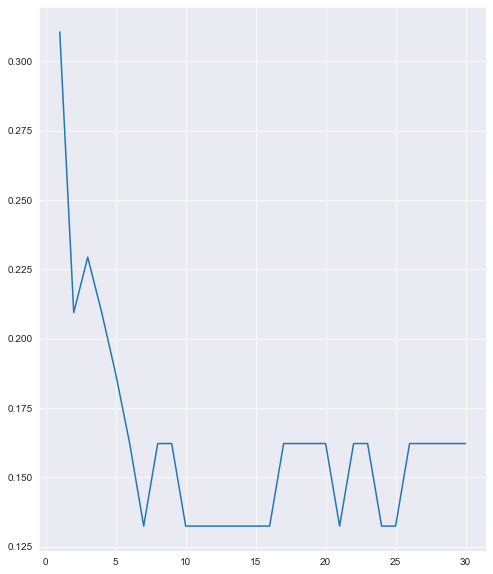

In [31]:
from sklearn.metrics import mean_squared_error
RMSE = []
for n in range(1, 31):
    pca = PCA(n_components= n)
    pca = pca.fit(Xs_train)
    Z_train = pca.transform(Xs_train)
    Z_test = pca.transform(Xs_test)
    log_reg = LogisticRegression()
    log_reg = log_reg.fit(Z_train, y_train)
    pred = log_reg.predict(Z_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    RMSE.append(rmse)
plt.plot(range(1,31),RMSE)
plt.rcParams["figure.figsize"] = (10,1)
plt.show()

In [32]:
RMSE.index(min(RMSE))

6

In [34]:
# since the lowest root mean squared error is at 7 n_components, we will redo the mmodel
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :30], df['target'], test_size = 0.2, random_state = 16)
sc = StandardScaler()
sc = sc.fit(X_train)
Xs_train = sc.transform(X_train)
Xs_test = sc.transform(X_test)
pca = PCA(n_components = 7)
pca = pca.fit(Xs_train)
Z_train = pca.transform(Xs_train)
Z_test = pca.transform(Xs_test)
model_accuracy(Z_train, Z_test, y_train, y_test)

                               Accuracy  Root Mean Squared Error  \
Logistic Regression             0.98246                 0.132453   
Support Vector Classification   0.97368                 0.162221   
Linear Discriminant Analysis    0.96491                 0.187317   
K Nearest Neighbors             0.96491                 0.187317   
Naive Bayes                     0.95614                 0.209427   
Decision Tree                   0.95614                 0.209427   

                               True Positive  True Negative  
Logistic Regression                  0.97561        0.98630  
Support Vector Classification        0.95238        0.98611  
Linear Discriminant Analysis         1.00000        0.94805  
K Nearest Neighbors                  0.95122        0.97260  
Naive Bayes                          0.95000        0.95946  
Decision Tree                        0.95000        0.95946  


In [35]:
# My Own Model
X_train, X_test, y_train, y_test = train_test_split(df[['worst radius','worst compactness', 'worst texture','worst symmetry', 'worst fractal dimension']], df['target'], test_size = 0.2, random_state = 15)
model_accuracy(X_train, X_test, y_train, y_test)

                               Accuracy  Root Mean Squared Error  \
Logistic Regression             0.92105                 0.280976   
Support Vector Classification   0.87719                 0.350438   
Linear Discriminant Analysis    0.92105                 0.280976   
K Nearest Neighbors             0.91228                 0.296174   
Naive Bayes                     0.92105                 0.280976   
Decision Tree                   0.86842                 0.362738   

                               True Positive  True Negative  
Logistic Regression                  0.89474        0.93421  
Support Vector Classification        0.87879        0.87654  
Linear Discriminant Analysis         0.96875        0.90244  
K Nearest Neighbors                  0.93939        0.90123  
Naive Bayes                          0.91667        0.92308  
Decision Tree                        0.80000        0.90541  


In [36]:
df[df['target'] == 0][[var for var in df.columns if 'worst' in var]].describe()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [37]:
df[df['target'] == 1][[var for var in df.columns if 'worst' in var]].describe()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


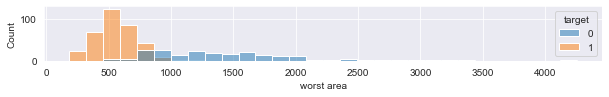

In [38]:
sns.histplot(data = df, x = 'worst area', hue = 'target')
plt.rcParams['figure.figsize'] = 4,4.5

In [39]:
import scipy.stats as st
st.t.interval(alpha = 0.99, df = len(df[df['target'] == 0]['worst area'])-1, loc = np.mean(df[df['target'] == 0]['worst area']), scale = st.sem(df[df['target'] == 0]['worst area']))

(1315.535485484049, 1529.037156025385)

In [40]:
st.t.interval(alpha = 0.99, df = len(df[df['target'] == 1]['worst area'])-1, loc = np.mean(df[df['target'] == 1]['worst area']), scale = st.sem(df[df['target'] == 1]['worst area']))

(536.4759050696956, 581.3229744821252)